In [28]:
pred_log = []

with open("Log1.txt", "r") as f:
    for line in f.readlines():
        if("Prediction" in line):
            pred_log.append(line)

lights1 = map(lambda x: x.split("Light 1: ")[1].split(" -")[0], pred_log)
lights2 = map(lambda x: x.split("Light 2:: ")[1].split(" -")[0], pred_log)
temp = map(lambda x: x.split("Temperature: ")[1].split(" -")[0], pred_log)
hum = map(lambda x: x.split("Humidity: ")[1].split(" -")[0], pred_log)
energy = map(lambda x: x.split("Energy Consumption: ")[1].split(" -")[0], pred_log)
time = list(map(lambda x: int(x.split("Time: ")[1].split("\n")[0]), pred_log))

def divide(a):
    return float(a[0]) / float(a[1])

lights1 = list(map(lambda x: divide(x.split("/")), lights1))
lights2 = list(map(lambda x: divide(x.split("/")), lights2))
temp = list(map(lambda x: divide(x.split("/")), temp))
hum = list(map(lambda x: divide(x.split("/")), hum))
energy = list(map(lambda x: divide(x.split("/")), energy))

print(pred_log[0])
print(lights1[0])
print(lights2[0])
print(temp[0])
print(hum[0])
print(energy[0])
print(time[0])

00:43.113	ID:1	Prediction: 00:43.139	ID:1	Light 1: 0/10000 - Light 2:: 0/10000 - Temperature: 0/10000 - Humidity: 0/10000 - Energy Consumption: 0/10000 - Time: 20

0.0
0.0
0.0
0.0
0.0
20


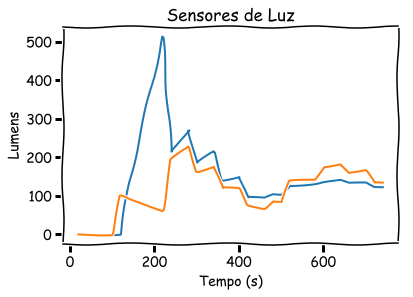

In [44]:
import matplotlib.pyplot as plt

plt.xkcd()
plt.plot(time, lights1)
plt.plot(time, lights2)
plt.title("Sensores de Luz")
plt.ylabel("Lumens")
plt.xlabel("Tempo (s)")
plt.show()

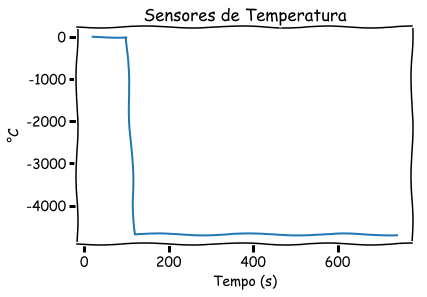

In [45]:
plt.plot(time, temp)
plt.title("Sensores de Temperatura")
plt.ylabel("°C")
plt.xlabel("Tempo (s)")
plt.show()

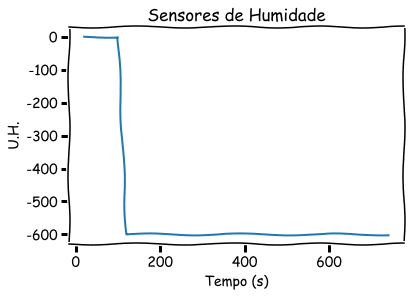

In [46]:
plt.plot(time, hum)
plt.title("Sensores de Humidade")
plt.ylabel("U.H.")
plt.xlabel("Tempo (s)")
plt.show()

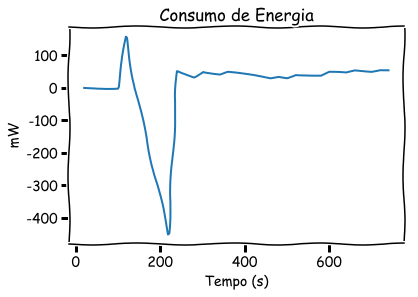

In [47]:
plt.plot(time, energy)
plt.title("Consumo de Energia")
plt.ylabel("mW")
plt.xlabel("Tempo (s)")
plt.show()